<a href="https://colab.research.google.com/github/tracieschroeder/Participant-Notebooks/blob/main/Earth%20Science/In%20Progress/Copy_of_TornadoMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Tornado Event Map

Objectives: Use code to access data from a large file. Plot data onto a map.
Analyze output to determine the answers to the following questions:
1. Where do the most tornadoes occur?
2. What regions do you see the least occurances of tornadoes?
Challenge Questions:  What land properties or weather circumstances make tornado events happen? Is Tornado Alley displayed accurately on this map?
(If the key of colors can be created...Where are the most intense? or least intense tornadoes occuring?)

The data recorded events of tornadoes in year 2022 in the USA.
We will add each tornado event location to a map of the USA.

This is some setup for our work. These functions will help us create graphs and see the data needed for this activity.

In [ ]:
# this cell only needs to be run once, but re-exectuing it doesn't hurt anything either
# imports software packages (not too exciting)
import  pandas as pd
import numpy as np
import geopandas as gpd
#install -c conda-forge descartes
import matplotlib as mpl
import matplotlib.pyplot as plt

We will access the data file now.

In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRCM-l2H-x9XAH1DTusPSp4dBjbjLYbJaSSecPHoDn7F6TRM8twSB0MbBaTG4C3r0bhkPaZDQduB6LG/pub?output=csv')
data.head(3)

,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,DEATHS_DIRECT,EF_NUM,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE
0,ALABAMA,2022,January,Tornado,0,0,1,34.9631,-87.1858,34.9968,-87.0996,An unusual severe weather event for this time ...,A tornado touched down near the intersection o...
1,ALABAMA,2022,January,Tornado,0,0,0,34.7161,-87.6413,34.7246,-87.6063,An unusual severe weather event for this time ...,A tornado with a peak wind speed of 65 mph tou...
2,ALABAMA,2022,January,Tornado,1,0,0,34.9468,-86.5983,34.9780,-86.4343,An unusual severe weather event for this time ...,A tornado with a peak wind speed of 85 mph tou...


We will access a map feature that we can use to plot our tornado events afterwards.

<ipython-input-69-3a9e0c636ca7>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-69-3a9e0c636ca7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


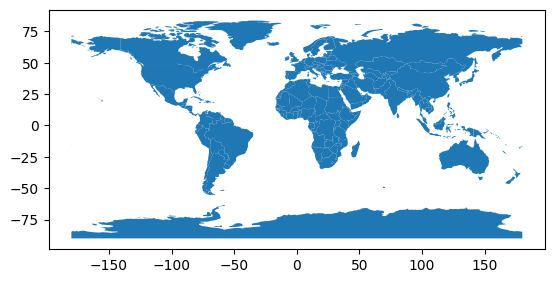

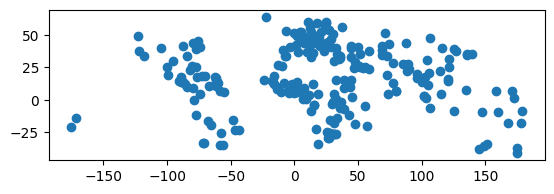

In [ ]:
# makes the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = gpd.read_file(gpd.datasets.get_path('https://www.naturalearthdata.com/downloads/110m-cultural-vectors/'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
#cities = gpd.read_file(gpd.datasets.get_path('https://www.naturalearthdata.com/downloads/110m-cultural-vectors/'))


world.plot();
cities.plot();

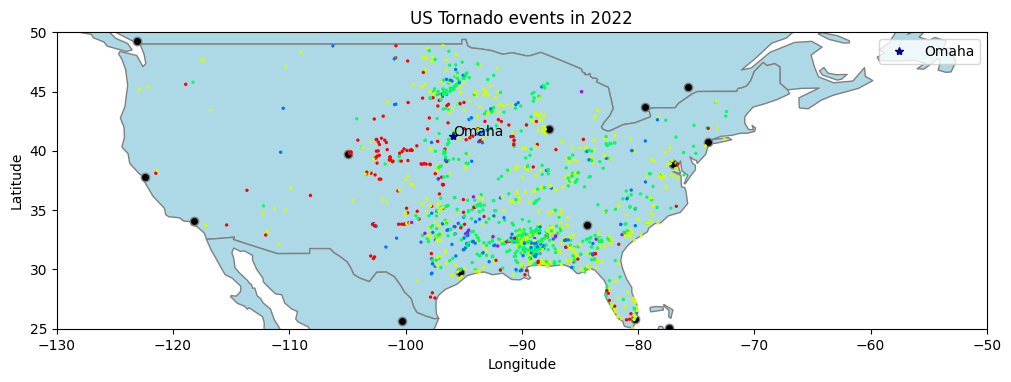

In [ ]:
# From the world map above, this is a zoomed in section that shows only a US map
fig, ax = plt.subplots(figsize=(12,7))
lat = data['BEGIN_LAT'] #access the latitude data
lon = data['BEGIN_LON'] #access the longitude data
world.plot(ax=ax, color='lightblue', edgecolor='grey') # this part is the map
cities.plot(ax=ax, color='black', edgecolor='grey') #This plots big cities for reference points
ax.plot(-95.9345,41.2565,'*', color='navy',label='Omaha') #Adds a star point for Omaha
ax.text(-95.9345,41.2565,'Omaha') #Add text for Omaha
ax.scatter(lon,lat, s=2, c=data['EF_NUM'], cmap ='hsv') # this adds the scatter points with a color coded to indicate EF intensity
ax.set_title('US Tornado events in 2022') #Add main title
ax.set_xlabel('Longitude') #Add x axis title
ax.set_ylabel('Latitude'). #Add y axis title
ax.set_xlim(-130,-50)# zoom in to show only the US
ax.set_ylim(25,50) # zoom in to show only the US
ax.legend() #print the legend, possible future challenge...Add the color key for the 6 EF values of the tornadoes
plt.show()